# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize for number of days)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
periods = range(2, 16)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

2 1993-11-11 00:00:00 BUY  215 SPY @ 46.38
1993-11-12 00:00:00 BUY  215 SPY @ 46.59
1993-11-15 00:00:00 BUY  215 SPY @ 46.56
1993-11-16 00:00:00 BUY  215 SPY @ 46.78
1993-11-17 00:00:00 BUY  216 SPY @ 46.53
1993-11-23 00:00:00 BUY  216 SPY @ 46.28
1993-11-29 00:00:00 BUY  216 SPY @ 46.31
1993-11-30 00:00:00 BUY  216 SPY @ 46.34
1993-12-07 00:00:00 BUY  214 SPY @ 46.84
1993-12-08 00:00:00 BUY  214 SPY @ 46.84
1993-12-09 00:00:00 BUY  215 SPY @ 46.69
1993-12-13 00:00:00 BUY  215 SPY @ 46.88
1993-12-14 00:00:00 BUY  216 SPY @ 46.53
1993-12-16 00:00:00 BUY  216 SPY @ 46.62
1993-12-17 00:00:00 BUY  217 SPY @ 46.56
1993-12-20 00:00:00 BUY  217 SPY @ 46.62
1993-12-21 00:00:00 BUY  217 SPY @ 46.47
1993-12-22 00:00:00 BUY  217 SPY @ 46.78
1993-12-23 00:00:00 BUY  217 SPY @ 46.75
1993-12-27 00:00:00 BUY  217 SPY @ 47.00
1993-12-29 00:00:00 BUY  217 SPY @ 47.03
1994-01-04 00:00:00 BUY  217 SPY @ 46.66
1994-01-06 00:00:00 BUY  217 SPY @ 46.75
1994-01-07 00:00:00 BUY  217 SPY @ 47.03
1994-01-11 00:

1998-06-09 00:00:00 BUY  126 SPY @ 112.22
1998-06-10 00:00:00 BUY  127 SPY @ 111.50
1998-06-12 00:00:00 BUY  127 SPY @ 110.44
1998-06-15 00:00:00 BUY  130 SPY @ 107.53
1998-06-16 00:00:00 BUY  130 SPY @ 109.19
1998-06-18 00:00:00 BUY  128 SPY @ 110.97
1998-06-22 00:00:00 BUY  128 SPY @ 110.59
1998-06-25 00:00:00 BUY  125 SPY @ 113.22
1998-06-26 00:00:00 BUY  125 SPY @ 113.69
1998-06-30 00:00:00 BUY  125 SPY @ 113.31
1998-07-01 00:00:00 BUY  125 SPY @ 114.62
1998-07-07 00:00:00 BUY  124 SPY @ 115.78
1998-07-08 00:00:00 BUY  124 SPY @ 116.62
1998-07-09 00:00:00 BUY  125 SPY @ 115.84
1998-07-10 00:00:00 BUY  125 SPY @ 116.47
1998-07-15 00:00:00 BUY  124 SPY @ 117.59
1998-07-16 00:00:00 BUY  124 SPY @ 118.41
1998-07-20 00:00:00 BUY  124 SPY @ 118.56
1998-07-22 00:00:00 BUY  124 SPY @ 116.50
1998-07-23 00:00:00 BUY  126 SPY @ 114.19
1998-07-27 00:00:00 BUY  126 SPY @ 114.91
1998-07-28 00:00:00 BUY  128 SPY @ 112.97
1998-07-30 00:00:00 BUY  128 SPY @ 114.22
1998-07-31 00:00:00 BUY  131 SPY @

2011-05-06 00:00:00 BUY  140 SPY @ 134.20
2011-05-11 00:00:00 BUY  140 SPY @ 134.44
2011-05-12 00:00:00 BUY  140 SPY @ 135.08
2011-05-13 00:00:00 BUY  141 SPY @ 134.04
2011-05-18 00:00:00 BUY  141 SPY @ 134.36
2011-05-20 00:00:00 BUY  142 SPY @ 133.61
2011-05-25 00:00:00 BUY  142 SPY @ 132.39
2011-06-01 00:00:00 BUY  143 SPY @ 131.87
2011-06-09 00:00:00 BUY  143 SPY @ 129.40
2011-06-10 00:00:00 BUY  145 SPY @ 127.60
2011-06-13 00:00:00 BUY  145 SPY @ 127.70
2011-06-15 00:00:00 BUY  145 SPY @ 127.02
2011-06-16 00:00:00 BUY  145 SPY @ 127.30
2011-06-17 00:00:00 BUY  146 SPY @ 127.05
2011-06-20 00:00:00 BUY  146 SPY @ 127.70
2011-06-22 00:00:00 BUY  145 SPY @ 128.67
2011-06-27 00:00:00 BUY  145 SPY @ 127.94
2011-07-05 00:00:00 BUY  138 SPY @ 133.81
2011-07-06 00:00:00 BUY  138 SPY @ 133.97
2011-07-08 00:00:00 BUY  138 SPY @ 134.40
2011-07-13 00:00:00 BUY  138 SPY @ 131.84
2011-07-14 00:00:00 BUY  139 SPY @ 130.93
2011-07-15 00:00:00 BUY  139 SPY @ 131.69
2011-07-18 00:00:00 BUY  140 SPY @

3 1993-11-17 00:00:00 BUY  214 SPY @ 46.53
1993-11-24 00:00:00 BUY  214 SPY @ 46.47
1993-11-29 00:00:00 BUY  215 SPY @ 46.31
1993-12-01 00:00:00 BUY  215 SPY @ 46.41
1993-12-08 00:00:00 BUY  213 SPY @ 46.84
1993-12-13 00:00:00 BUY  213 SPY @ 46.88
1993-12-14 00:00:00 BUY  215 SPY @ 46.53
1993-12-16 00:00:00 BUY  215 SPY @ 46.62
1993-12-21 00:00:00 BUY  215 SPY @ 46.47
1993-12-22 00:00:00 BUY  215 SPY @ 46.78
1993-12-30 00:00:00 BUY  215 SPY @ 46.84
1994-01-04 00:00:00 BUY  215 SPY @ 46.66
1994-01-12 00:00:00 BUY  212 SPY @ 47.34
1994-01-14 00:00:00 BUY  212 SPY @ 47.41
1994-01-19 00:00:00 BUY  212 SPY @ 47.34
1994-01-20 00:00:00 BUY  212 SPY @ 47.47
1994-01-24 00:00:00 BUY  214 SPY @ 47.19
1994-01-26 00:00:00 BUY  214 SPY @ 47.31
1994-02-04 00:00:00 BUY  215 SPY @ 46.97
1994-02-08 00:00:00 BUY  215 SPY @ 47.22
1994-02-10 00:00:00 BUY  216 SPY @ 47.00
1994-02-14 00:00:00 BUY  216 SPY @ 47.22
1994-02-17 00:00:00 BUY  216 SPY @ 47.16
1994-02-22 00:00:00 BUY  216 SPY @ 47.34
1994-02-24 00:

2010-09-17 00:00:00 BUY  193 SPY @ 112.49
2010-09-20 00:00:00 BUY  193 SPY @ 114.21
2010-09-22 00:00:00 BUY  194 SPY @ 113.42
2010-09-24 00:00:00 BUY  194 SPY @ 114.82
2010-09-30 00:00:00 BUY  195 SPY @ 114.13
2010-10-01 00:00:00 BUY  195 SPY @ 114.61
2010-10-04 00:00:00 BUY  197 SPY @ 113.75
2010-10-05 00:00:00 BUY  197 SPY @ 116.04
2010-10-07 00:00:00 BUY  197 SPY @ 115.89
2010-10-08 00:00:00 BUY  197 SPY @ 116.54
2010-10-19 00:00:00 BUY  197 SPY @ 116.73
2010-10-21 00:00:00 BUY  197 SPY @ 118.13
2010-10-27 00:00:00 BUY  196 SPY @ 118.38
2010-10-29 00:00:00 BUY  196 SPY @ 118.49
2010-11-09 00:00:00 BUY  191 SPY @ 121.61
2010-11-18 00:00:00 BUY  191 SPY @ 119.96
2010-11-23 00:00:00 BUY  194 SPY @ 118.45
2010-11-24 00:00:00 BUY  194 SPY @ 120.20
2010-11-30 00:00:00 BUY  196 SPY @ 118.49
2010-12-01 00:00:00 BUY  196 SPY @ 121.01
2010-12-15 00:00:00 BUY  191 SPY @ 124.10
2010-12-16 00:00:00 BUY  191 SPY @ 124.82
2010-12-30 00:00:00 BUY  190 SPY @ 125.72
2011-01-03 00:00:00 BUY  190 SPY @

4 1993-11-17 00:00:00 BUY  214 SPY @ 46.53
1993-11-24 00:00:00 BUY  214 SPY @ 46.47
1993-12-09 00:00:00 BUY  213 SPY @ 46.69
1993-12-13 00:00:00 BUY  213 SPY @ 46.88
1993-12-14 00:00:00 BUY  215 SPY @ 46.53
1993-12-20 00:00:00 BUY  215 SPY @ 46.62
1993-12-21 00:00:00 BUY  216 SPY @ 46.47
1993-12-22 00:00:00 BUY  216 SPY @ 46.78
1993-12-30 00:00:00 BUY  215 SPY @ 46.84
1994-01-05 00:00:00 BUY  215 SPY @ 46.75
1994-01-13 00:00:00 BUY  213 SPY @ 47.22
1994-01-17 00:00:00 BUY  213 SPY @ 47.41
1994-01-19 00:00:00 BUY  214 SPY @ 47.34
1994-01-20 00:00:00 BUY  214 SPY @ 47.47
1994-01-24 00:00:00 BUY  215 SPY @ 47.19
1994-01-27 00:00:00 BUY  215 SPY @ 47.75
1994-02-04 00:00:00 BUY  218 SPY @ 46.97
1994-02-09 00:00:00 BUY  218 SPY @ 47.41
1994-02-10 00:00:00 BUY  220 SPY @ 47.00
1994-02-15 00:00:00 BUY  220 SPY @ 47.47
1994-02-17 00:00:00 BUY  222 SPY @ 47.16
1994-03-04 00:00:00 BUY  222 SPY @ 46.69
1994-03-10 00:00:00 BUY  222 SPY @ 46.59
1994-03-16 00:00:00 BUY  222 SPY @ 47.25
1994-03-21 00:

2014-03-11 00:00:00 BUY  206 SPY @ 187.23
2014-03-18 00:00:00 BUY  206 SPY @ 187.66
2014-03-21 00:00:00 BUY  207 SPY @ 186.20
2014-03-31 00:00:00 BUY  207 SPY @ 187.01
2014-04-04 00:00:00 BUY  208 SPY @ 186.40
2014-04-09 00:00:00 BUY  208 SPY @ 187.09
2014-04-10 00:00:00 BUY  212 SPY @ 183.16
2014-04-15 00:00:00 BUY  212 SPY @ 184.20
2014-04-25 00:00:00 BUY  210 SPY @ 186.29
2014-04-30 00:00:00 BUY  210 SPY @ 188.31
2014-05-06 00:00:00 BUY  212 SPY @ 186.78
2014-05-09 00:00:00 BUY  212 SPY @ 187.96
2014-05-15 00:00:00 BUY  212 SPY @ 187.40
2014-05-21 00:00:00 BUY  212 SPY @ 189.13
2014-06-11 00:00:00 BUY  206 SPY @ 194.92
2014-06-17 00:00:00 BUY  206 SPY @ 194.83
2014-06-23 00:00:00 BUY  205 SPY @ 195.88
2014-06-27 00:00:00 BUY  205 SPY @ 195.82
2014-07-08 00:00:00 BUY  204 SPY @ 196.24
2014-07-14 00:00:00 BUY  204 SPY @ 197.60
2014-07-17 00:00:00 BUY  206 SPY @ 195.71
2014-07-22 00:00:00 BUY  206 SPY @ 198.20
2014-07-25 00:00:00 BUY  207 SPY @ 197.72
2014-08-08 00:00:00 BUY  207 SPY @

5 1993-11-18 00:00:00 BUY  215 SPY @ 46.41
1993-11-24 00:00:00 BUY  215 SPY @ 46.47
1993-12-09 00:00:00 BUY  214 SPY @ 46.69
1993-12-13 00:00:00 BUY  214 SPY @ 46.88
1993-12-14 00:00:00 BUY  216 SPY @ 46.53
1993-12-20 00:00:00 BUY  216 SPY @ 46.62
1993-12-21 00:00:00 BUY  216 SPY @ 46.47
1993-12-22 00:00:00 BUY  216 SPY @ 46.78
1993-12-31 00:00:00 BUY  217 SPY @ 46.59
1994-01-06 00:00:00 BUY  217 SPY @ 46.75
1994-01-24 00:00:00 BUY  215 SPY @ 47.19
1994-01-27 00:00:00 BUY  215 SPY @ 47.75
1994-02-04 00:00:00 BUY  219 SPY @ 46.97
1994-02-15 00:00:00 BUY  219 SPY @ 47.47
1994-02-17 00:00:00 BUY  220 SPY @ 47.16
1994-03-07 00:00:00 BUY  220 SPY @ 46.94
1994-03-10 00:00:00 BUY  222 SPY @ 46.59
1994-03-16 00:00:00 BUY  222 SPY @ 47.25
1994-03-21 00:00:00 BUY  224 SPY @ 46.84
1994-04-06 00:00:00 BUY  224 SPY @ 44.81
1994-08-22 00:00:00 BUY  216 SPY @ 46.38
1994-08-23 00:00:00 BUY  216 SPY @ 46.64
1994-09-01 00:00:00 BUY  212 SPY @ 47.50
1994-09-08 00:00:00 BUY  212 SPY @ 47.50
1994-09-09 00:

2015-11-06 00:00:00 BUY  182 SPY @ 210.04
2015-11-18 00:00:00 BUY  182 SPY @ 208.73
2015-11-30 00:00:00 BUY  182 SPY @ 208.69
2015-12-01 00:00:00 BUY  182 SPY @ 210.68
2015-12-02 00:00:00 BUY  184 SPY @ 208.53
2015-12-16 00:00:00 BUY  184 SPY @ 208.03
2016-03-23 00:00:00 BUY  188 SPY @ 203.21
2016-03-29 00:00:00 BUY  188 SPY @ 205.12
2016-04-05 00:00:00 BUY  189 SPY @ 204.19
2016-04-13 00:00:00 BUY  189 SPY @ 208.00
2016-04-22 00:00:00 BUY  188 SPY @ 208.97
2016-04-27 00:00:00 BUY  188 SPY @ 209.35
2016-04-28 00:00:00 BUY  190 SPY @ 207.45
2016-05-10 00:00:00 BUY  190 SPY @ 208.45
2016-05-13 00:00:00 BUY  193 SPY @ 204.76
2016-05-24 00:00:00 BUY  193 SPY @ 207.87
2016-06-10 00:00:00 BUY  191 SPY @ 210.07
2016-06-21 00:00:00 BUY  191 SPY @ 208.44
2016-06-24 00:00:00 BUY  196 SPY @ 203.24
2016-06-30 00:00:00 BUY  196 SPY @ 209.48
2016-08-02 00:00:00 BUY  191 SPY @ 215.55
2016-08-05 00:00:00 BUY  191 SPY @ 218.18
2016-08-24 00:00:00 BUY  191 SPY @ 217.85
2016-09-02 00:00:00 BUY  191 SPY @

2009-06-15 00:00:00 BUY  305 SPY @ 92.90
2009-06-29 00:00:00 BUY  305 SPY @ 92.70
2009-07-02 00:00:00 BUY  315 SPY @ 89.81
2009-07-13 00:00:00 BUY  315 SPY @ 90.10
2009-08-11 00:00:00 BUY  284 SPY @ 99.73
2009-08-13 00:00:00 BUY  284 SPY @ 101.57
2009-08-17 00:00:00 BUY  294 SPY @ 98.31
2009-08-21 00:00:00 BUY  294 SPY @ 102.97
2009-08-31 00:00:00 BUY  295 SPY @ 102.46
2009-09-08 00:00:00 BUY  295 SPY @ 102.94
2009-09-23 00:00:00 BUY  286 SPY @ 106.18
2009-10-07 00:00:00 BUY  286 SPY @ 105.80
2009-10-21 00:00:00 BUY  280 SPY @ 108.23
2009-11-05 00:00:00 BUY  280 SPY @ 106.85
2009-11-20 00:00:00 BUY  273 SPY @ 109.43
2009-11-25 00:00:00 BUY  273 SPY @ 111.38
2009-12-08 00:00:00 BUY  277 SPY @ 109.61
2009-12-11 00:00:00 BUY  277 SPY @ 111.11
2009-12-17 00:00:00 BUY  280 SPY @ 110.18
2009-12-22 00:00:00 BUY  280 SPY @ 111.73
2009-12-31 00:00:00 BUY  280 SPY @ 111.44
2010-01-04 00:00:00 BUY  280 SPY @ 113.33
2010-01-15 00:00:00 BUY  280 SPY @ 113.64
2010-01-19 00:00:00 BUY  280 SPY @ 115.0

2019-09-20 00:00:00 BUY  193 SPY @ 298.28
2019-10-11 00:00:00 BUY  193 SPY @ 296.28
7 1993-11-19 00:00:00 BUY  215 SPY @ 46.31
1993-12-02 00:00:00 BUY  215 SPY @ 46.53
1993-12-14 00:00:00 BUY  215 SPY @ 46.53
1993-12-22 00:00:00 BUY  215 SPY @ 46.78
1993-12-31 00:00:00 BUY  216 SPY @ 46.59
1994-01-07 00:00:00 BUY  216 SPY @ 47.03
1994-01-24 00:00:00 BUY  216 SPY @ 47.19
1994-01-27 00:00:00 BUY  216 SPY @ 47.75
1994-02-04 00:00:00 BUY  219 SPY @ 46.97
1994-02-15 00:00:00 BUY  219 SPY @ 47.47
1994-02-18 00:00:00 BUY  222 SPY @ 46.88
1994-03-07 00:00:00 BUY  222 SPY @ 46.94
1994-03-21 00:00:00 BUY  222 SPY @ 46.84
1994-04-21 00:00:00 BUY  222 SPY @ 44.91
1994-09-07 00:00:00 BUY  211 SPY @ 47.27
1994-09-15 00:00:00 BUY  211 SPY @ 47.64
1994-10-21 00:00:00 BUY  216 SPY @ 46.56
1994-10-28 00:00:00 BUY  216 SPY @ 47.66
1994-11-04 00:00:00 BUY  222 SPY @ 46.33
1994-12-14 00:00:00 BUY  222 SPY @ 45.75
1995-03-07 00:00:00 BUY  210 SPY @ 48.44
1995-03-10 00:00:00 BUY  210 SPY @ 49.27
1995-04-18 0

8 1993-11-19 00:00:00 BUY  215 SPY @ 46.31
1993-12-02 00:00:00 BUY  215 SPY @ 46.53
1993-12-14 00:00:00 BUY  215 SPY @ 46.53
1993-12-27 00:00:00 BUY  215 SPY @ 47.00
1994-01-03 00:00:00 BUY  218 SPY @ 46.47
1994-01-07 00:00:00 BUY  218 SPY @ 47.03
1994-01-24 00:00:00 BUY  217 SPY @ 47.19
1994-01-27 00:00:00 BUY  217 SPY @ 47.75
1994-02-04 00:00:00 BUY  221 SPY @ 46.97
1994-02-15 00:00:00 BUY  221 SPY @ 47.47
1994-02-18 00:00:00 BUY  224 SPY @ 46.88
1994-03-07 00:00:00 BUY  224 SPY @ 46.94
1994-03-24 00:00:00 BUY  226 SPY @ 46.38
1994-04-21 00:00:00 BUY  226 SPY @ 44.91
1994-09-07 00:00:00 BUY  215 SPY @ 47.27
1994-09-15 00:00:00 BUY  215 SPY @ 47.64
1994-10-21 00:00:00 BUY  220 SPY @ 46.56
1994-10-28 00:00:00 BUY  220 SPY @ 47.66
1994-11-04 00:00:00 BUY  226 SPY @ 46.33
1994-12-14 00:00:00 BUY  226 SPY @ 45.75
1995-03-07 00:00:00 BUY  214 SPY @ 48.44
1995-03-10 00:00:00 BUY  214 SPY @ 49.27
1995-04-18 00:00:00 BUY  208 SPY @ 50.61
1995-04-24 00:00:00 BUY  208 SPY @ 51.48
1995-05-18 00:

9 1993-11-22 00:00:00 BUY  217 SPY @ 46.03
1993-12-02 00:00:00 BUY  217 SPY @ 46.53
1993-12-14 00:00:00 BUY  217 SPY @ 46.53
1993-12-27 00:00:00 BUY  217 SPY @ 47.00
1994-01-03 00:00:00 BUY  219 SPY @ 46.47
1994-01-10 00:00:00 BUY  219 SPY @ 47.59
1994-01-24 00:00:00 BUY  221 SPY @ 47.19
1994-01-27 00:00:00 BUY  221 SPY @ 47.75
1994-02-04 00:00:00 BUY  225 SPY @ 46.97
1994-03-09 00:00:00 BUY  225 SPY @ 46.97
1994-03-24 00:00:00 BUY  228 SPY @ 46.38
1994-04-21 00:00:00 BUY  228 SPY @ 44.91
1994-09-09 00:00:00 BUY  218 SPY @ 47.00
1994-09-15 00:00:00 BUY  218 SPY @ 47.64
1994-10-21 00:00:00 BUY  223 SPY @ 46.56
1994-10-28 00:00:00 BUY  223 SPY @ 47.66
1995-03-07 00:00:00 BUY  219 SPY @ 48.44
1995-03-10 00:00:00 BUY  219 SPY @ 49.27
1995-04-19 00:00:00 BUY  213 SPY @ 50.56
1995-04-24 00:00:00 BUY  213 SPY @ 51.48
1995-05-18 00:00:00 BUY  211 SPY @ 52.06
1995-05-23 00:00:00 BUY  211 SPY @ 53.16
1995-07-19 00:00:00 BUY  203 SPY @ 55.27
1995-07-27 00:00:00 BUY  203 SPY @ 56.66
1995-08-11 00:

10 1993-11-22 00:00:00 BUY  217 SPY @ 46.03
1993-12-02 00:00:00 BUY  217 SPY @ 46.53
1993-12-15 00:00:00 BUY  217 SPY @ 46.47
1993-12-27 00:00:00 BUY  217 SPY @ 47.00
1994-01-03 00:00:00 BUY  220 SPY @ 46.47
1994-01-10 00:00:00 BUY  220 SPY @ 47.59
1994-01-24 00:00:00 BUY  221 SPY @ 47.19
1994-01-27 00:00:00 BUY  221 SPY @ 47.75
1994-02-04 00:00:00 BUY  225 SPY @ 46.97
1994-03-09 00:00:00 BUY  225 SPY @ 46.97
1994-03-24 00:00:00 BUY  228 SPY @ 46.38
1994-04-21 00:00:00 BUY  228 SPY @ 44.91
1994-09-09 00:00:00 BUY  218 SPY @ 47.00
1994-09-15 00:00:00 BUY  218 SPY @ 47.64
1994-10-24 00:00:00 BUY  225 SPY @ 46.17
1994-10-28 00:00:00 BUY  225 SPY @ 47.66
1995-03-07 00:00:00 BUY  221 SPY @ 48.44
1995-03-10 00:00:00 BUY  221 SPY @ 49.27
1995-04-19 00:00:00 BUY  215 SPY @ 50.56
1995-04-24 00:00:00 BUY  215 SPY @ 51.48
1995-05-18 00:00:00 BUY  213 SPY @ 52.06
1995-05-23 00:00:00 BUY  213 SPY @ 53.16
1995-07-19 00:00:00 BUY  205 SPY @ 55.27
1995-07-27 00:00:00 BUY  205 SPY @ 56.66
1995-08-11 00

11 1993-11-22 00:00:00 BUY  217 SPY @ 46.03
1993-12-02 00:00:00 BUY  217 SPY @ 46.53
1993-12-21 00:00:00 BUY  217 SPY @ 46.47
1993-12-27 00:00:00 BUY  217 SPY @ 47.00
1994-01-03 00:00:00 BUY  220 SPY @ 46.47
1994-01-10 00:00:00 BUY  220 SPY @ 47.59
1994-01-24 00:00:00 BUY  221 SPY @ 47.19
1994-01-27 00:00:00 BUY  221 SPY @ 47.75
1994-02-04 00:00:00 BUY  225 SPY @ 46.97
1994-03-16 00:00:00 BUY  225 SPY @ 47.25
1994-03-24 00:00:00 BUY  229 SPY @ 46.38
1994-04-25 00:00:00 BUY  229 SPY @ 45.33
1994-09-09 00:00:00 BUY  221 SPY @ 47.00
1994-10-11 00:00:00 BUY  221 SPY @ 46.62
1995-03-07 00:00:00 BUY  213 SPY @ 48.44
1995-03-10 00:00:00 BUY  213 SPY @ 49.27
1995-04-19 00:00:00 BUY  207 SPY @ 50.56
1995-04-24 00:00:00 BUY  207 SPY @ 51.48
1995-05-18 00:00:00 BUY  205 SPY @ 52.06
1995-05-23 00:00:00 BUY  205 SPY @ 53.16
1995-08-11 00:00:00 BUY  196 SPY @ 55.66
1995-08-14 00:00:00 BUY  196 SPY @ 56.16
1995-09-27 00:00:00 BUY  189 SPY @ 58.16
1995-10-13 00:00:00 BUY  189 SPY @ 58.62
1995-10-26 00

2015-01-05 00:00:00 BUY  210 SPY @ 201.72
2015-01-22 00:00:00 BUY  210 SPY @ 206.10
2015-03-06 00:00:00 BUY  209 SPY @ 207.50
2015-03-18 00:00:00 BUY  209 SPY @ 210.46
2015-03-26 00:00:00 BUY  214 SPY @ 205.27
2015-04-09 00:00:00 BUY  214 SPY @ 208.90
2015-05-06 00:00:00 BUY  215 SPY @ 208.04
2015-05-14 00:00:00 BUY  215 SPY @ 212.21
2015-06-04 00:00:00 BUY  217 SPY @ 210.13
2015-06-18 00:00:00 BUY  217 SPY @ 212.78
2015-06-29 00:00:00 BUY  225 SPY @ 205.42
2015-07-14 00:00:00 BUY  225 SPY @ 210.68
2015-07-27 00:00:00 BUY  229 SPY @ 206.79
2015-08-17 00:00:00 BUY  229 SPY @ 210.59
2015-11-11 00:00:00 BUY  232 SPY @ 207.74
2015-11-24 00:00:00 BUY  232 SPY @ 209.35
2016-04-28 00:00:00 BUY  234 SPY @ 207.45
2016-05-25 00:00:00 BUY  234 SPY @ 209.28
2016-06-13 00:00:00 BUY  235 SPY @ 208.45
2016-07-08 00:00:00 BUY  235 SPY @ 212.65
2016-08-02 00:00:00 BUY  232 SPY @ 215.55
2016-08-05 00:00:00 BUY  232 SPY @ 218.18
2016-08-25 00:00:00 BUY  232 SPY @ 217.70
2016-09-06 00:00:00 BUY  232 SPY @

13 1993-12-21 00:00:00 BUY  215 SPY @ 46.47
1993-12-27 00:00:00 BUY  215 SPY @ 47.00
1994-01-03 00:00:00 BUY  217 SPY @ 46.47
1994-01-10 00:00:00 BUY  217 SPY @ 47.59
1994-02-04 00:00:00 BUY  220 SPY @ 46.97
1994-03-16 00:00:00 BUY  220 SPY @ 47.25
1994-03-24 00:00:00 BUY  224 SPY @ 46.38
1994-04-25 00:00:00 BUY  224 SPY @ 45.33
1994-09-12 00:00:00 BUY  217 SPY @ 46.86
1994-10-11 00:00:00 BUY  217 SPY @ 46.62
1995-03-07 00:00:00 BUY  209 SPY @ 48.44
1995-03-10 00:00:00 BUY  209 SPY @ 49.27
1995-08-11 00:00:00 BUY  185 SPY @ 55.66
1995-08-16 00:00:00 BUY  185 SPY @ 56.20
1995-10-09 00:00:00 BUY  179 SPY @ 57.92
1995-10-13 00:00:00 BUY  179 SPY @ 58.62
1995-10-26 00:00:00 BUY  182 SPY @ 57.75
1995-11-03 00:00:00 BUY  182 SPY @ 59.23
1995-12-18 00:00:00 BUY  178 SPY @ 60.62
1996-01-03 00:00:00 BUY  178 SPY @ 62.31
1996-01-10 00:00:00 BUY  185 SPY @ 59.97
1996-01-24 00:00:00 BUY  185 SPY @ 61.92
1996-02-29 00:00:00 BUY  179 SPY @ 63.88
1996-04-01 00:00:00 BUY  179 SPY @ 65.44
1996-04-08 00

14 1993-12-21 00:00:00 BUY  215 SPY @ 46.47
1993-12-27 00:00:00 BUY  215 SPY @ 47.00
1994-01-03 00:00:00 BUY  217 SPY @ 46.47
1994-01-10 00:00:00 BUY  217 SPY @ 47.59
1994-02-04 00:00:00 BUY  220 SPY @ 46.97
1994-03-16 00:00:00 BUY  220 SPY @ 47.25
1994-03-24 00:00:00 BUY  224 SPY @ 46.38
1994-04-25 00:00:00 BUY  224 SPY @ 45.33
1995-03-07 00:00:00 BUY  210 SPY @ 48.44
1995-03-10 00:00:00 BUY  210 SPY @ 49.27
1995-08-11 00:00:00 BUY  186 SPY @ 55.66
1995-08-25 00:00:00 BUY  186 SPY @ 56.30
1995-10-09 00:00:00 BUY  180 SPY @ 57.92
1995-10-13 00:00:00 BUY  180 SPY @ 58.62
1995-10-26 00:00:00 BUY  183 SPY @ 57.75
1995-11-03 00:00:00 BUY  183 SPY @ 59.23
1995-12-18 00:00:00 BUY  179 SPY @ 60.62
1996-01-24 00:00:00 BUY  179 SPY @ 61.92
1996-02-29 00:00:00 BUY  173 SPY @ 63.88
1996-04-01 00:00:00 BUY  173 SPY @ 65.44
1996-04-08 00:00:00 BUY  176 SPY @ 64.39
1996-04-25 00:00:00 BUY  176 SPY @ 65.30
1996-05-06 00:00:00 BUY  179 SPY @ 64.25
1996-05-13 00:00:00 BUY  179 SPY @ 66.36
1996-06-18 00

15 1994-01-03 00:00:00 BUY  215 SPY @ 46.47
1994-01-10 00:00:00 BUY  215 SPY @ 47.59
1994-02-04 00:00:00 BUY  218 SPY @ 46.97
1994-03-16 00:00:00 BUY  218 SPY @ 47.25
1994-03-24 00:00:00 BUY  222 SPY @ 46.38
1994-04-25 00:00:00 BUY  222 SPY @ 45.33
1995-03-07 00:00:00 BUY  207 SPY @ 48.44
1995-03-10 00:00:00 BUY  207 SPY @ 49.27
1995-08-11 00:00:00 BUY  184 SPY @ 55.66
1995-08-25 00:00:00 BUY  184 SPY @ 56.30
1995-10-09 00:00:00 BUY  178 SPY @ 57.92
1995-10-13 00:00:00 BUY  178 SPY @ 58.62
1995-10-26 00:00:00 BUY  181 SPY @ 57.75
1995-11-03 00:00:00 BUY  181 SPY @ 59.23
1995-12-18 00:00:00 BUY  177 SPY @ 60.62
1996-01-24 00:00:00 BUY  177 SPY @ 61.92
1996-02-29 00:00:00 BUY  171 SPY @ 63.88
1996-04-01 00:00:00 BUY  171 SPY @ 65.44
1996-04-08 00:00:00 BUY  174 SPY @ 64.39
1996-04-26 00:00:00 BUY  174 SPY @ 65.44
1996-05-06 00:00:00 BUY  177 SPY @ 64.25
1996-05-13 00:00:00 BUY  177 SPY @ 66.36
1996-06-18 00:00:00 BUY  177 SPY @ 66.34
1996-07-01 00:00:00 BUY  177 SPY @ 67.69
1996-07-05 00

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,3.49,5.37,6.39,6.09,6.97,7.40,7.56,6.96,6.65,7.07,6.66,6.15,5.48,5.57
max_closed_out_drawdown,-18.25,-16.99,-15.78,-14.04,-14.02,-14.63,-15.79,-15.38,-15.00,-14.97,-16.57,-18.13,-17.34,-17.39
drawdown_annualized_return,-5.23,-3.16,-2.47,-2.31,-2.01,-1.98,-2.09,-2.21,-2.25,-2.12,-2.49,-2.95,-3.16,-3.12
drawdown_recovery,-0.91,-0.91,-0.05,-0.05,-0.05,-1.84,-1.84,-1.66,-1.66,-1.66,-0.05,-1.28,-0.19,-0.19
best_month,8.75,12.09,11.04,10.05,10.05,12.88,12.85,13.27,10.71,11.05,10.72,10.72,10.71,11.35
worst_month,-13.74,-15.62,-15.29,-13.55,-13.53,-13.54,-12.29,-13.73,-13.72,-13.70,-16.28,-16.28,-13.97,-14.03
sharpe_ratio,0.43,0.60,0.71,0.67,0.75,0.77,0.79,0.75,0.72,0.76,0.71,0.65,0.59,0.61
sortino_ratio,0.31,0.43,0.51,0.49,0.55,0.58,0.59,0.54,0.52,0.55,0.50,0.46,0.41,0.42
monthly_std,2.09,2.11,1.96,1.94,1.95,2.08,2.13,2.04,2.01,2.02,2.06,2.11,2.02,1.96
pct_time_in_market,33.83,31.75,31.03,30.27,29.64,30.13,29.53,28.17,28.41,28.14,27.99,28.08,27.28,26.24


Bar graphs

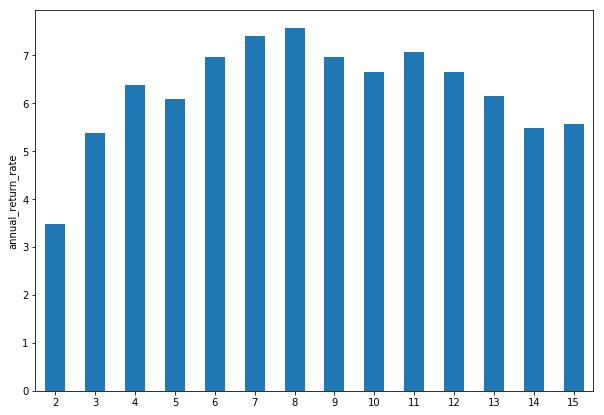

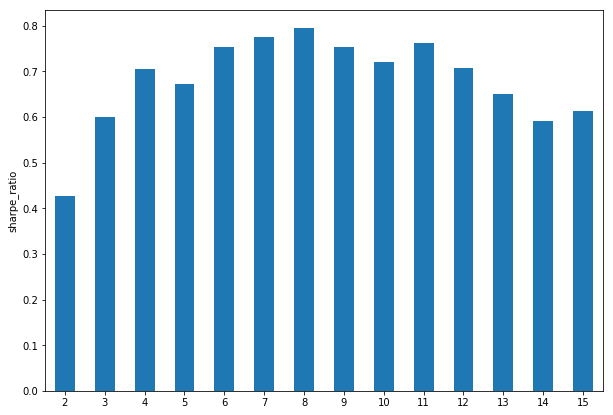

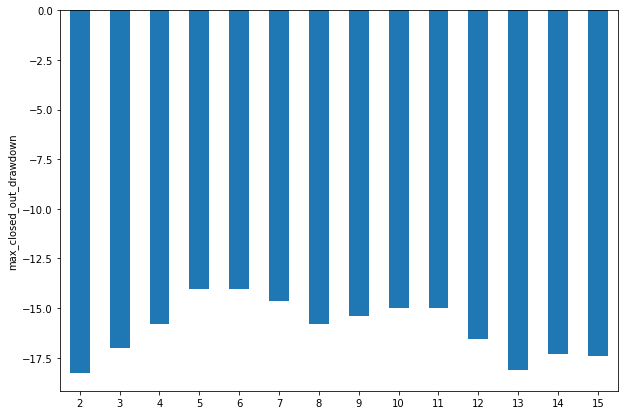

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2019-10-21 00:00:00 SELL 215 SPY @ 299.99


Equity curve

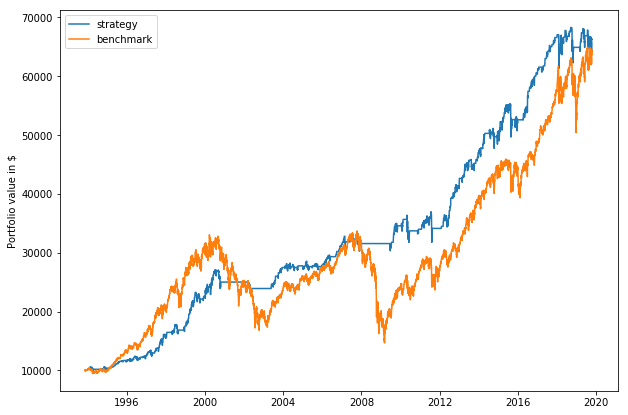

In [9]:
pf.plot_equity_curve(strategies['8'].dbal, benchmark=benchmark.dbal)